**In this assignment students have to make ARIMA model over shampoo
sales data and check the MSE between predicted and actual value.**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
from pandas import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [249]:
def parser(x):
	return datetime.strptime('19'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', sep=';', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


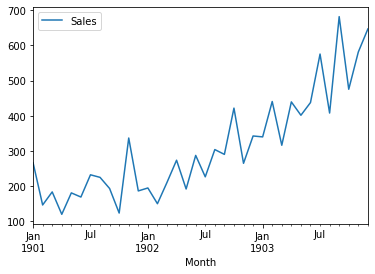

In [201]:
series.plot()

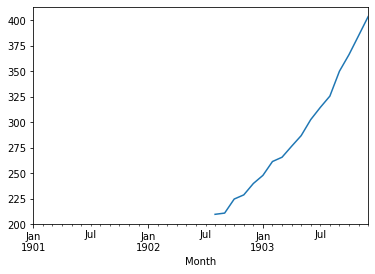

In [202]:
moving_average_sales=series['Sales'].rolling(window=20).mean()
moving_average_sales.plot()

In [149]:
#import numpy as np
#series1=np.log(series)
#series['Difference']=series['Sales']-series['Sales'].shift(1)

In [203]:
series.dropna(inplace=True,axis=0)

In [ ]:
#moving_average_sales=series['Difference'].rolling(window=20).mean().plot

In [169]:
import statsmodels.api as sm

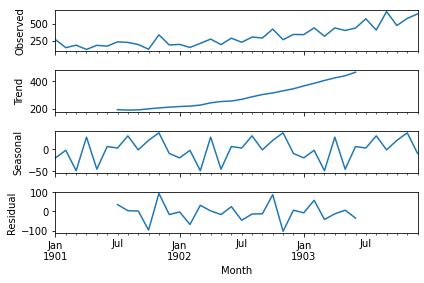

In [171]:
decomposition=sm.tsa.seasonal_decompose(series,model='addictive')
fig=decomposition.plot()
plt.show()

In [172]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

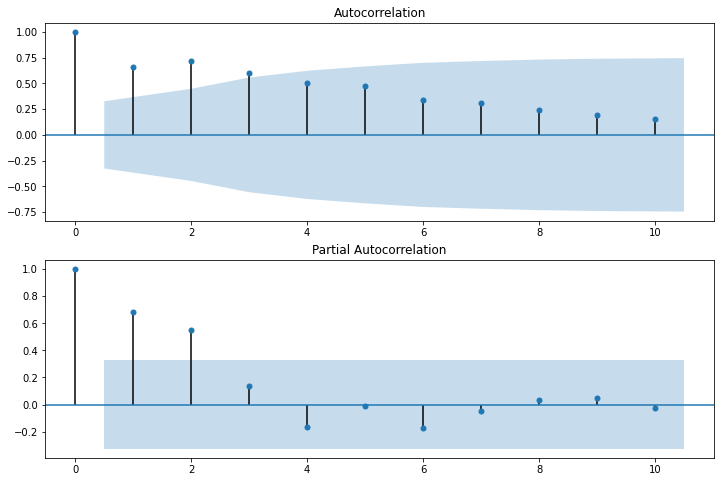

In [173]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales'],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales'],lags=10,ax=ax2)

In [347]:
train, test = series[0:20], series[20:]

In [348]:
from statsmodels.tsa.arima_model import ARIMA
arima= ARIMA(train,order=(3,2,1))
model=arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [349]:
pred= model.forecast(steps=16)[0]
pred

array([263.64987213, 320.79277258, 300.69193169, 347.88404567,
       339.82319687, 379.13912082, 381.20794696, 416.29411823,
       425.41794278, 457.89279721, 472.79327041, 504.15353297,
       523.52557271, 554.66375368, 577.80115764, 609.39375979])

In [350]:
from sklearn.metrics import mean_squared_error
import numpy as np
print(mean_squared_error(test,pred))

4652.756825910641
